In [1]:
from google_play_scraper import app, reviews, Sort
import pandas as pd
import wordcloud
from datetime import datetime
import matplotlib.pyplot as plt
from konlpy.tag import Okt
import numpy as np
# 앱 정보 가져오기
package_name = "com.velox.hkmc_tm1k"  # 패키지 이름

app_info = app(package_name)
print("앱 이름:", app_info['title'])


앱 이름: 현대 블루링크


In [2]:
app_review = {
    'pos' : {
        'review' : [],
        'score' : [],
        'app_version' : [],
        'at' : [],
    },
    'neutral' : {
        'review' : [],
        'score' : [],
        'app_version' : [],
        'at' : [],
    },
    'neg' : {
        'review' : [],
        'score' : [],
        'app_version' : [],
        'at' : [],
    }            
}

In [3]:
# 앱 리뷰 가져오기 - 5점 리뷰
continuation_token=None
for i in range(2):
    reviews_result, continuation_token = reviews(
        package_name,
        lang='ko',  # 한국어
        country='kr',  # 한국 사용자
        # sort=Sort.NEWEST,
        count=200,  # 가져올 리뷰 수
        filter_score_with=5,  # 특정 평점 필터링 (None: 모든 평점)
        continuation_token=continuation_token
    )
    for review in reviews_result:
        app_review['pos']['review'].append(review['content'])
        app_review['pos']['score'].append(review['score'])
        app_review['pos']['app_version'].append(review['reviewCreatedVersion'])
        app_review['pos']['at'].append(review['at'])

In [4]:
# 앱 리뷰 가져오기 - 3, 4점 리뷰
continuation_token=None
reviews_result, continuation_token = reviews(
    package_name,
    lang='ko',  # 한국어
    country='kr',  # 한국 사용자
    # sort=Sort.NEWEST,
    count=200,  # 가져올 리뷰 수
    filter_score_with=4,  # 특정 평점 필터링 (None: 모든 평점)
    continuation_token=continuation_token
)
for review in reviews_result:
    app_review['neutral']['review'].append(review['content'])
    app_review['neutral']['score'].append(review['score'])
    app_review['neutral']['app_version'].append(review['reviewCreatedVersion'])
    app_review['neutral']['at'].append(review['at'])

continuation_token=None
reviews_result, continuation_token = reviews(
    package_name,
    lang='ko',  # 한국어
    country='kr',  # 한국 사용자
    # sort=Sort.NEWEST,
    count=200,  # 가져올 리뷰 수
    filter_score_with=3,  # 특정 평점 필터링 (None: 모든 평점)
    continuation_token=continuation_token
)
for review in reviews_result:
    app_review['neutral']['review'].append(review['content'])
    app_review['neutral']['score'].append(review['score'])
    app_review['neutral']['app_version'].append(review['reviewCreatedVersion'])
    app_review['neutral']['at'].append(review['at'])     

In [5]:
# 앱 리뷰 가져오기 - 1, 2점 리뷰
continuation_token=None
reviews_result, continuation_token = reviews(
    package_name,
    lang='ko',  # 한국어
    country='kr',  # 한국 사용자
    # sort=Sort.NEWEST,
    count=200,  # 가져올 리뷰 수
    filter_score_with=1,  # 특정 평점 필터링 (None: 모든 평점)
    continuation_token=continuation_token
)
for review in reviews_result:
    app_review['neg']['review'].append(review['content'])
    app_review['neg']['score'].append(review['score'])
    app_review['neg']['app_version'].append(review['reviewCreatedVersion'])
    app_review['neg']['at'].append(review['at'])

continuation_token=None    
reviews_result, continuation_token = reviews(
    package_name,
    lang='ko',  # 한국어
    country='kr',  # 한국 사용자
    # sort=Sort.NEWEST,
    count=200,  # 가져올 리뷰 수
    filter_score_with=2,  # 특정 평점 필터링 (None: 모든 평점)
    continuation_token=continuation_token
)
for review in reviews_result:
    app_review['neg']['review'].append(review['content'])
    app_review['neg']['score'].append(review['score'])
    app_review['neg']['app_version'].append(review['reviewCreatedVersion'])
    app_review['neg']['at'].append(review['at'])  

In [6]:
pos_review = pd.DataFrame(app_review['pos'])
neutral_review = pd.DataFrame(app_review['neutral'])
neg_review = pd.DataFrame(app_review['neg'])

In [7]:
font_path='D2Coding-Ver1.3.2-20180524.ttf'

In [8]:
stopwords = []
with open("stopwords.txt", "r", encoding="utf-8") as file:
    stopwords = file.read().splitlines()
    # word_list = [line.strip() for line in file] <-- use this if the file is tooooo large to load
stopwords.append('블루링크')
stopwords.append('블루  링크')
stopwords.append('블루')
stopwords.append('링크')

## 처리 서순이 매우 중요!!
- 먼저 텍스트를 품사별로 쪼개야 개별 단어에 대해 불용어 처리가 가능함
  1. 품사 쪼개기
  2. 불용어 처리

In [9]:
okt = Okt()
def remove_stopwords(text:str):
    tokens = okt.nouns(text)
    # tokens = text.split(' ')
    stops = stopwords
    meaningful_words = [w for w in tokens if not w in stops]
    return ' '.join(meaningful_words)

In [10]:
neg_review['review'] = neg_review['review'].map(remove_stopwords)
neg_words = list(neg_review['review'])
pos_review['review'] = pos_review['review'].map(remove_stopwords)
pos_words = list(pos_review['review'])
neutral_review['review'] = neutral_review['review'].map(remove_stopwords)
neutral_words = list(neutral_review['review'])

In [11]:
neg_cloud = wordcloud.WordCloud(font_path=font_path, colormap='YlOrRd', max_words=200).generate(' '.join(list(neg_words)))
neg_dict = neg_cloud.words_
pos_cloud = wordcloud.WordCloud(font_path=font_path, colormap='YlGnBu', max_words=200).generate(' '.join(list(pos_words)))
pos_dict = pos_cloud.words_
neutral_cloud = wordcloud.WordCloud(font_path=font_path, colormap='Spectral', max_words=200).generate(' '.join(list(neutral_words)))
neutral_dict = neg_cloud.words_

In [12]:
common_key = set(pos_dict.keys()) & set(neg_dict.keys()) # 91 words

In [13]:
diff_senti = {}
for c in common_key:
    # print(f"Pos: {round(pos_dict[c] ,4)}\t Neg: {round(neg_dict[c], 4)}\tWord: {c}\t ")
    diff_senti[c] = abs(pos_dict[c] - neg_dict[c])

In [14]:
diff_avg = np.average(list(diff_senti.values()))
print("diff_avg: ", diff_avg)
diff_std = np.std(list(diff_senti.values()))
print("diff_std: ", diff_std)

diff_avg:  0.09541722014249487
diff_std:  0.12038596045287611


In [15]:
diff_senti = {k : v for k, v in diff_senti.items() if abs(pos_dict[k] - neg_dict[k]) <= (diff_avg + diff_std)}

### Mutual Exclusivity Filter:
특정 단어가 감성 간 공통 등장하지만, 출현 빈도 차이가 
Threshold>X% 이상이면 유지.

In [18]:
pos_pure = {}
for k, v in pos_dict.items():
    if k not in diff_senti:
        # print(f"{k} : {round(v, 4)}")
        pos_pure[k] = v
        
neg_pure = {}
for k, v in neg_dict.items():
    if k not in diff_senti: 
        # print(f"{k} : {round(v, 4)}")
        neg_pure[k] = v
        
neutral_pure = {}
for k, v in neutral_dict.items():
    if k not in diff_senti: 
        # print(f"{k} : {round(v, 4)}")
        neutral_pure[k] = v

(np.float64(-0.5), np.float64(399.5), np.float64(199.5), np.float64(-0.5))

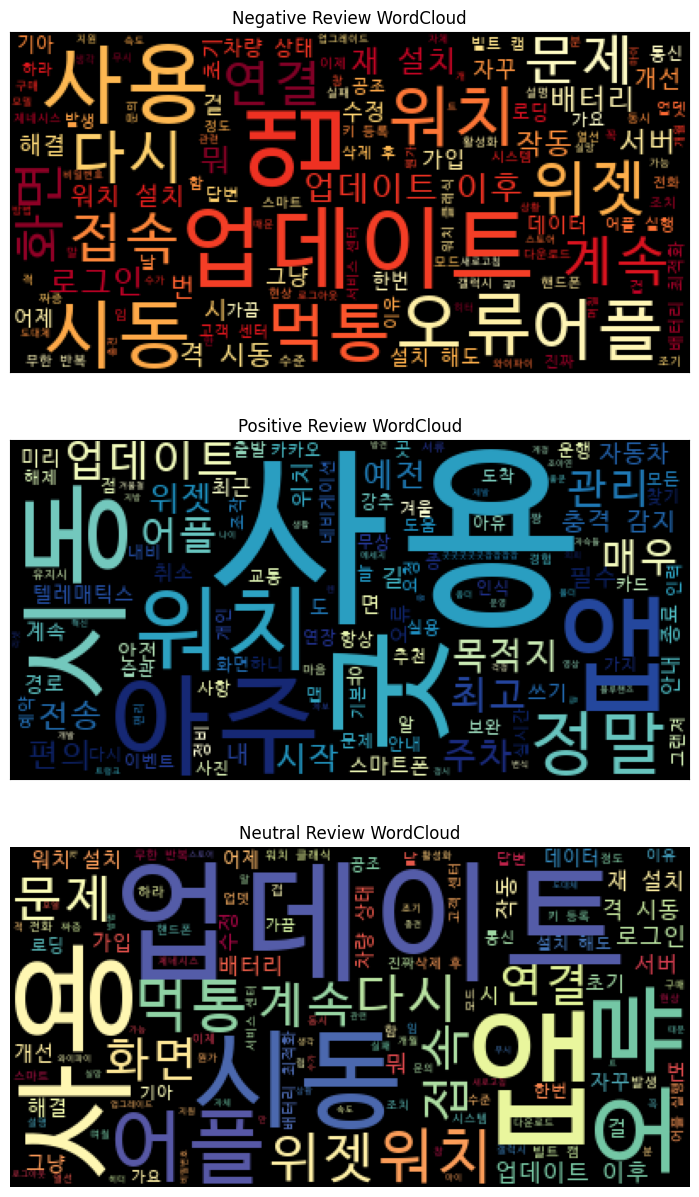

In [22]:
fig, axs = plt.subplots(3,1, figsize=(45,15))
neg_cloud_pure = wordcloud.WordCloud(font_path=font_path, colormap='YlOrRd', max_words=200).generate_from_frequencies(neg_pure)
pos_cloud_pure = wordcloud.WordCloud(font_path=font_path, colormap='YlGnBu', max_words=200).generate_from_frequencies(pos_pure)
neutral_cloud_pure = wordcloud.WordCloud(font_path=font_path, colormap='Spectral', max_words=200).generate_from_frequencies(neutral_pure)

axs[0].imshow(neg_cloud_pure)
axs[0].yaxis.set_visible(False)
axs[0].xaxis.set_visible(False)
axs[0].set_title("Negative Review WordCloud")

axs[1].imshow(pos_cloud_pure)# wordcloud 객체를 넣으면 워드클라우드 형태의 그래프 생성
axs[1].yaxis.set_visible(False)
axs[1].xaxis.set_visible(False)
axs[1].set_title("Positive Review WordCloud")

axs[2].imshow(neutral_cloud_pure)# wordcloud 객체를 넣으면 워드클라우드 형태의 그래프 생성
axs[2].yaxis.set_visible(False)
axs[2].xaxis.set_visible(False)
axs[2].set_title("Neutral Review WordCloud")

plt.axis('off')  #눈금 삭제 